# Homework 4 Part 1 - Solutions

This is an individual assignment.

---

Write your answers using markdown cells or embed handwritten answers with ```IPython.display.Image```.

---

# Exercise 1 (8 points)

**Consider the following application scenarios. Between the Linear Support Vector Machines (SVM) and Logistic Regression (LR), which one would you select for each scenario? Justify your answers.**

1. (2 points) **Detecting fraudulent transactions in a credit card dataset, where the fraudulent transactions might be a minority class and are likely to be distinct from normal transactions.**

The fact that classes are likely to not be normal, this makes it disadvantageous for LR since it assumption class Gaussianity. Moreover, in a class imbalance scenario, SVMs are often preferred as their aim is find the optimal hyperplane that maximizes the margin between classes. This characteristic makes SVM more robust to outliers and capable of handling separable datasets better than logistic regression. In situations where there are outliers present, SVM might provide better classification performance.

2. (2 points) **Text classification tasks, where each word or n-gram can be considered as a feature, leading to high-dimensional feature spaces.**

Linear SVM is known for its effectiveness in high-dimensional spaces, especially when the number of features is greater than the number of samples. The SVM decision boundary is determined by a subset of training samples, known as support vectors, making it computationally efficient and well-suited for high-dimensional data.

3. (2 points) **Medical diagnosis, where the occurrence of a rare disease is much lower than that of the healthy population.**

Linear SVM can handle imbalanced datasets well, where the number of instances in one class significantly outweighs the other. SVM can optimize the margin by considering support vectors from both classes, resulting in a balanced decision boundary.

4. (2 points) **Large-scale text categorization, where the focus is on assigning documents to predefined categories, rather than estimating the probability of belonging to a specific class.**

Logistic Regression outputs probabilities of class membership, which might be computationally expensive for large datasets. On the other hand, SVM solely relies on the decision boundary, making it more efficient when probability estimation is not required.

---

# Exercise 2 (10 points)

**Consider a feed-forward multilayer perceptron with a $D$-$M$-$D$ architecture ($M \leq D$) and linear activation functions. Show that such a neural network, when trained to predict the input at the output layer, performs principal component analysis by considering the minimization it solves. Indicate if the network will require bias terms.**

The network is trained to minimize the mean squared error (MSE) objective function between the predicted output and the actual input during the training process.

The reconstructed input (at the output layer) can be defined as:

\begin{align*}
\hat{x} = \sum_{i=1}^M y_i a_i
\end{align*}

And, the hidden layer projection can be defined as:

\begin{align*}
y_j = x^Ta_j 
\end{align*}

where $A^TA = I$.

The residual error is thus:

\begin{align*}
\epsilon = x - \hat{x} = \sum_{i=m+1}^D y_i a_i
\end{align*}

The MSE objective function can be rewritten as:

\begin{align*}
J &= E\left[ \|\epsilon\|^2_2\right]\\
&= E\left[\left( \sum_{i=m+1}^D y_ia_i\right)\left( \sum_{i=m+1}^D y_i a_i\right) \right]\\
&=\sum_{j=m+1}^D E [y_j^2], \text{because }a_i^Ta_j=0, \forall i\neq j \text{ and }a_i^Ta_j=1, \forall i=j\\
&=\sum_{j=m+1}^D E [(a_j^T\mathbf{x})(\mathbf{x}^Ta_j)]\\
&= \sum_{j=m+1}^D a_j^T E[\mathbf{x}\mathbf{x}^T]a_j\\
&= \sum_{j=m+1}^D a_j^T R_x a_j
\end{align*}

Minimizing the objective and incorporate Lagrange parameters for $A^TA=I$:

\begin{align*}
\frac{\partial J}{\partial a_j} &= 2(R_x a_j - \lambda_j a_j) = 0\\
R_x a_j &= \lambda_j a_j
\end{align*}

So, the sum of the error is the sum of the eigenvalues of the unused eigenvectors.  So, we want to select the eigenvectors with the $m$ largest eigenvalues. Similar to PCA.

---

# Exercise 3 (6 points)

**Propose an objective function that incorporates class information into PCA such that instances of the same class are mapped to nearby locations in the new space. You do not have to solve for a solution, but must explain all terms and their function.**

We can incorporate a term to the objective function to encourage samples from the same classes to be mapped near each other, and samples from different classes to be mapped far away from each other.

For example, consider,

\begin{align*}
J(\mathbf{U}) &= \mathbf{U}^T\mathbf{R}_X\mathbf{U} - \lambda \sum_{i\in C_k}\sum_{j\in C_k} \Vert \mathbf{y}_i - \mathbf{y}_j\Vert_2^2
\end{align*}

where $\mathbf{y}_i$ is the projection of sample $\mathbf{x}_i$ and $\lambda$ is a hyperparameter. The optimization problem is thus,

$$\arg\max_{\mathbf{U}} J(\mathbf{U})$$

The second term computes the pairwise distance between all points in the same class. Maximizing $J(\mathbf{U})$ will *force* the second term to have a small value.

---

# Exercise 4 (10 points)

**Design the simplest feed-forward MLP, by specifying numerical values for its weights and biases, using the threshold activation function, $\phi(x) = \begin{cases} 1 & x >0\\ -1 & x\leq 0\end{cases}$, to solve the following scenarios:**

1. (2 points) **The NAND logic gate, $\overline{x_1 \cap x_2} = \overline{x_1} \cup \overline{x_2}$, where $x_i\in\{0,1\}, i=1,2$.**

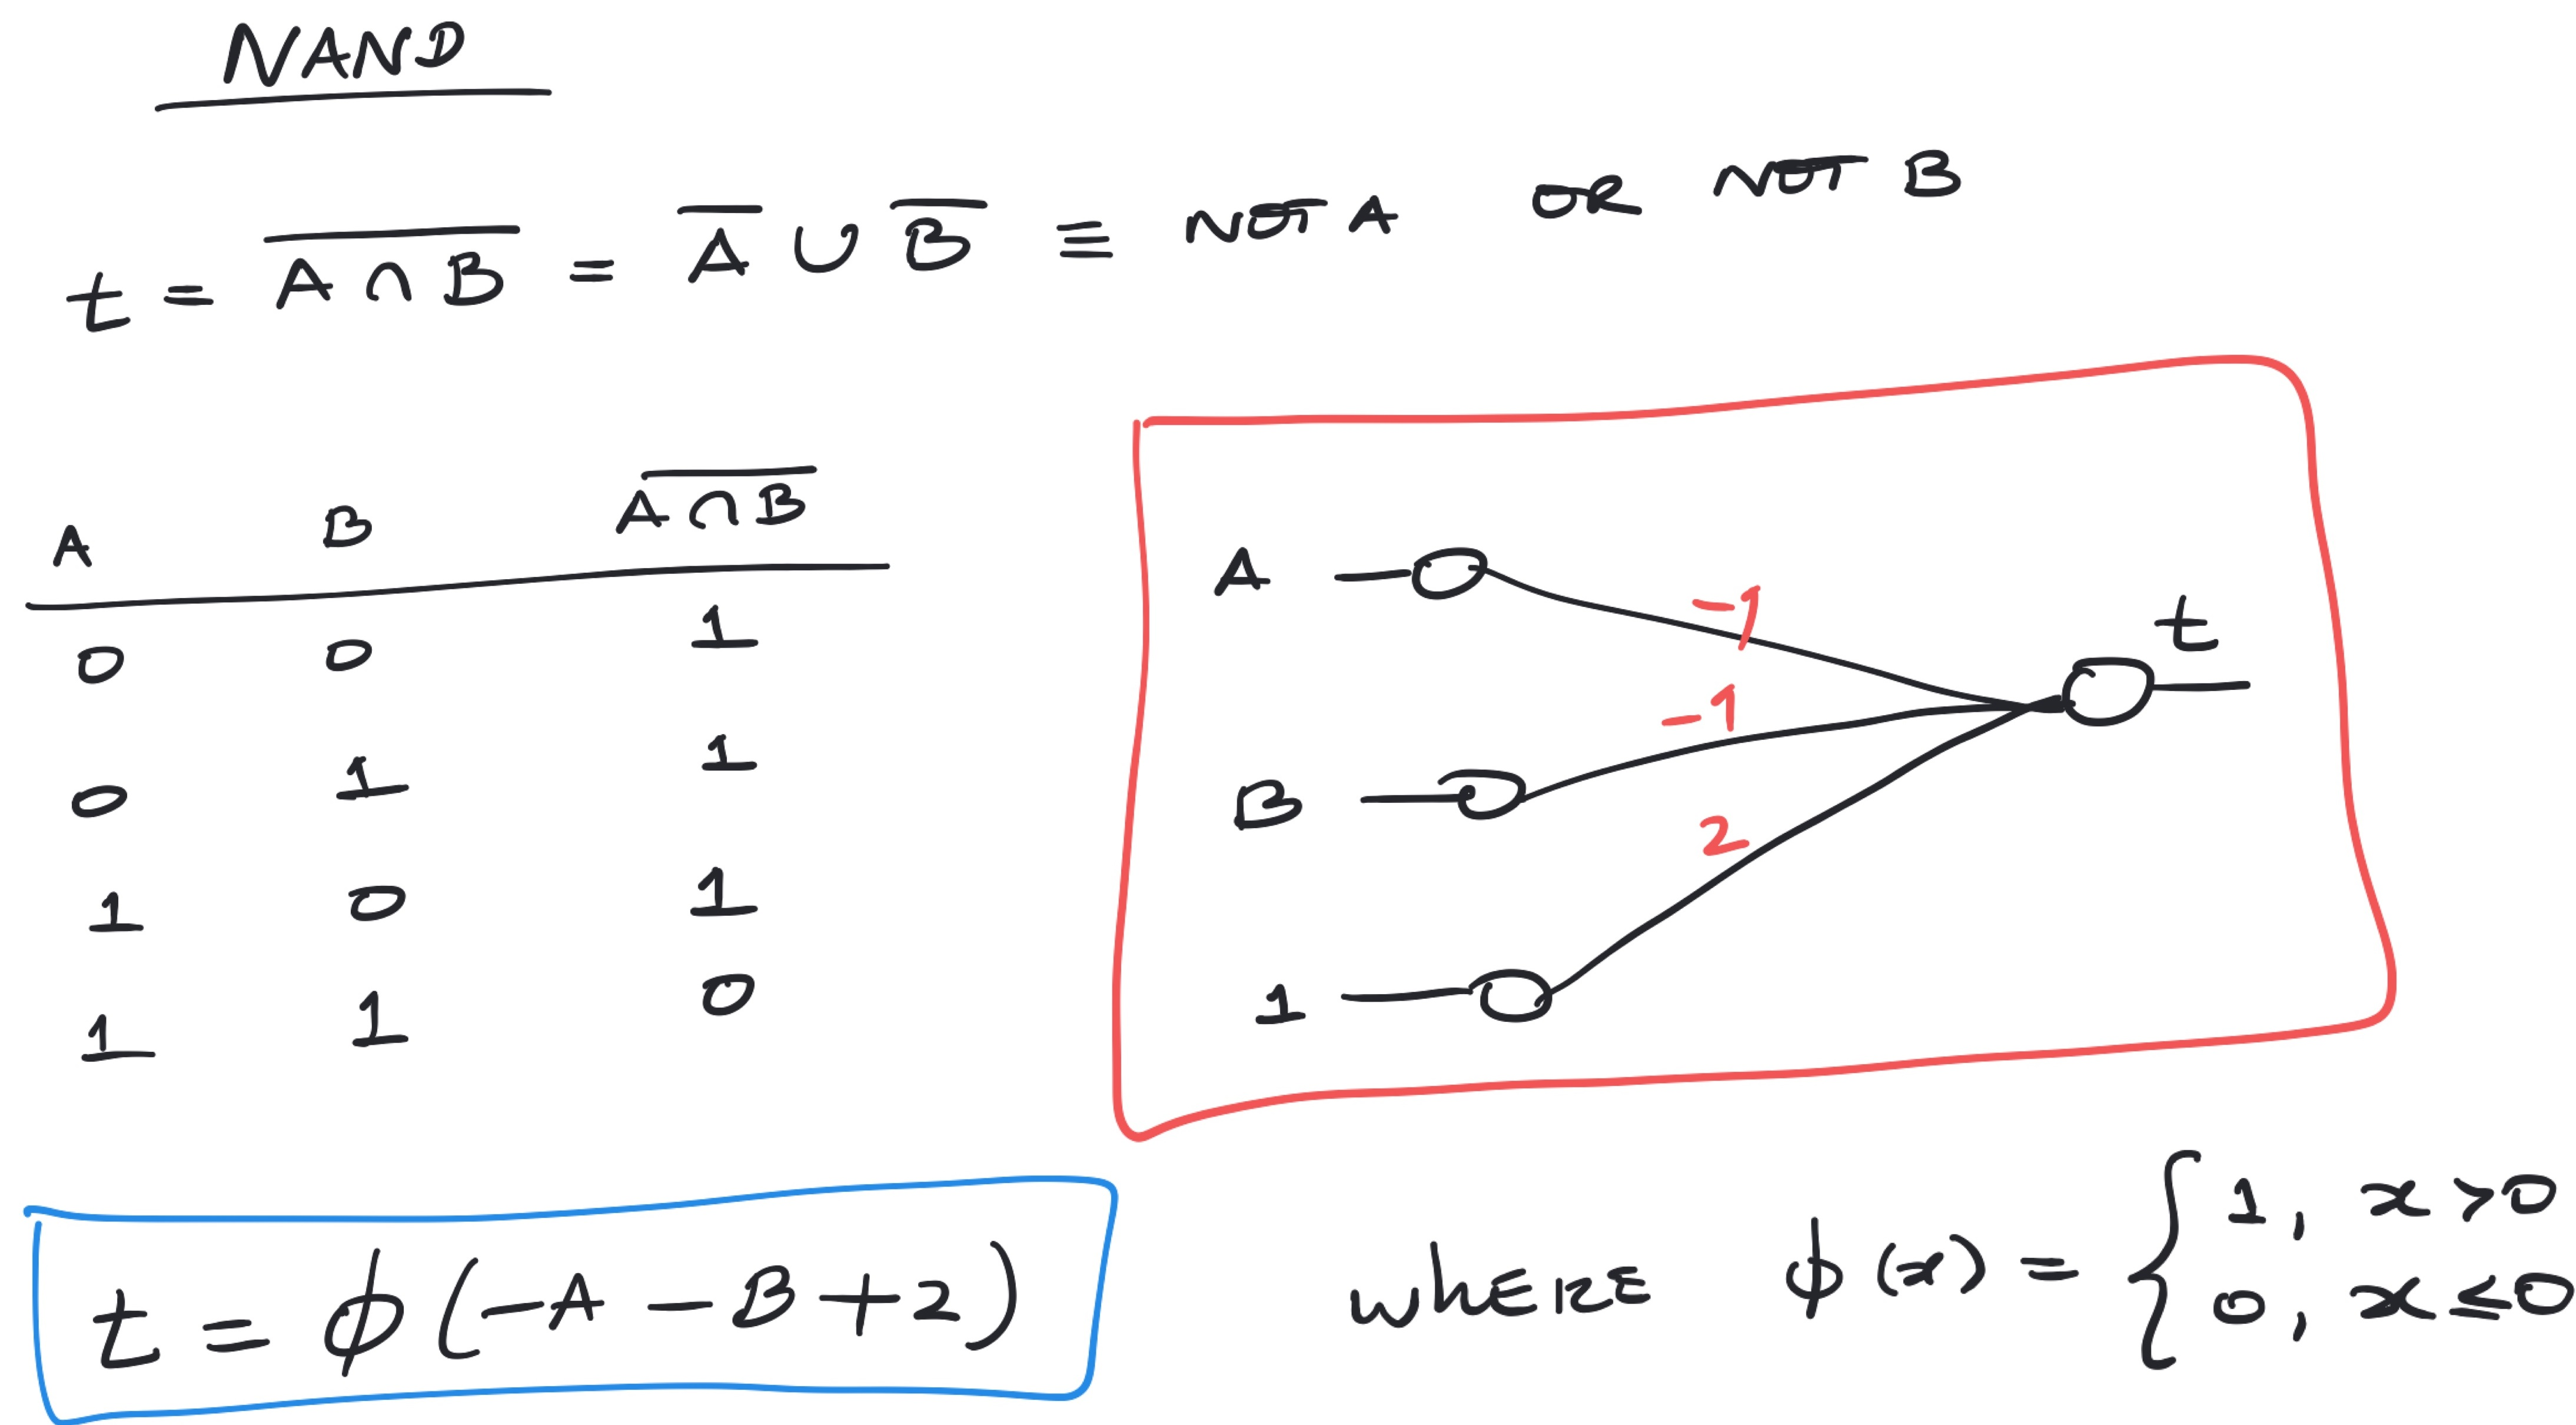

In [1]:
from IPython.display import Image
Image('figures/nand_gate.jpg', width=800)

2. (4 points) **The following two-dimensional dataset,**

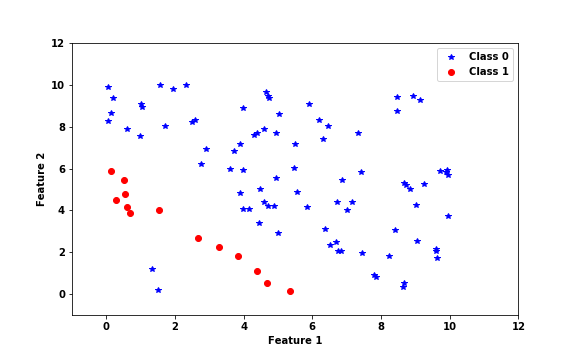

In [2]:
from IPython.display import Image
Image('figures/dataset.png', width=500)

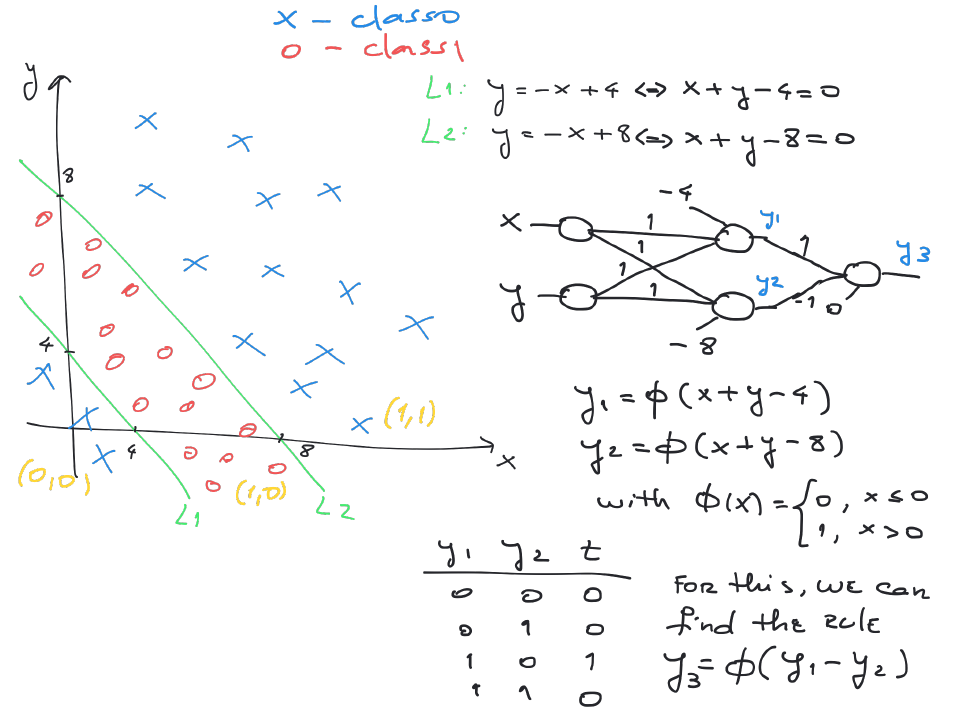

In [3]:
Image('figures/Q4solution.png',width=800)

3. (4 points) **The given ground truth table,**

| x1 | x2 | x3 | t | 
| --  |  -- |  -- | --|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 1 |
| 0 | 1 | 0 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 1 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 |

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import numpy as np

X = np.array([[0,0,0],
         [0,0,1],
         [0,1,0],
         [0,1,1],
         [1,0,0],
         [1,0,1],
         [1,1,0],
         [1,1,1]]).T

t = np.array([0,1,1,0,1,0,0,1])

X.shape, t.shape

((3, 8), (8,))

<IPython.core.display.Javascript object>


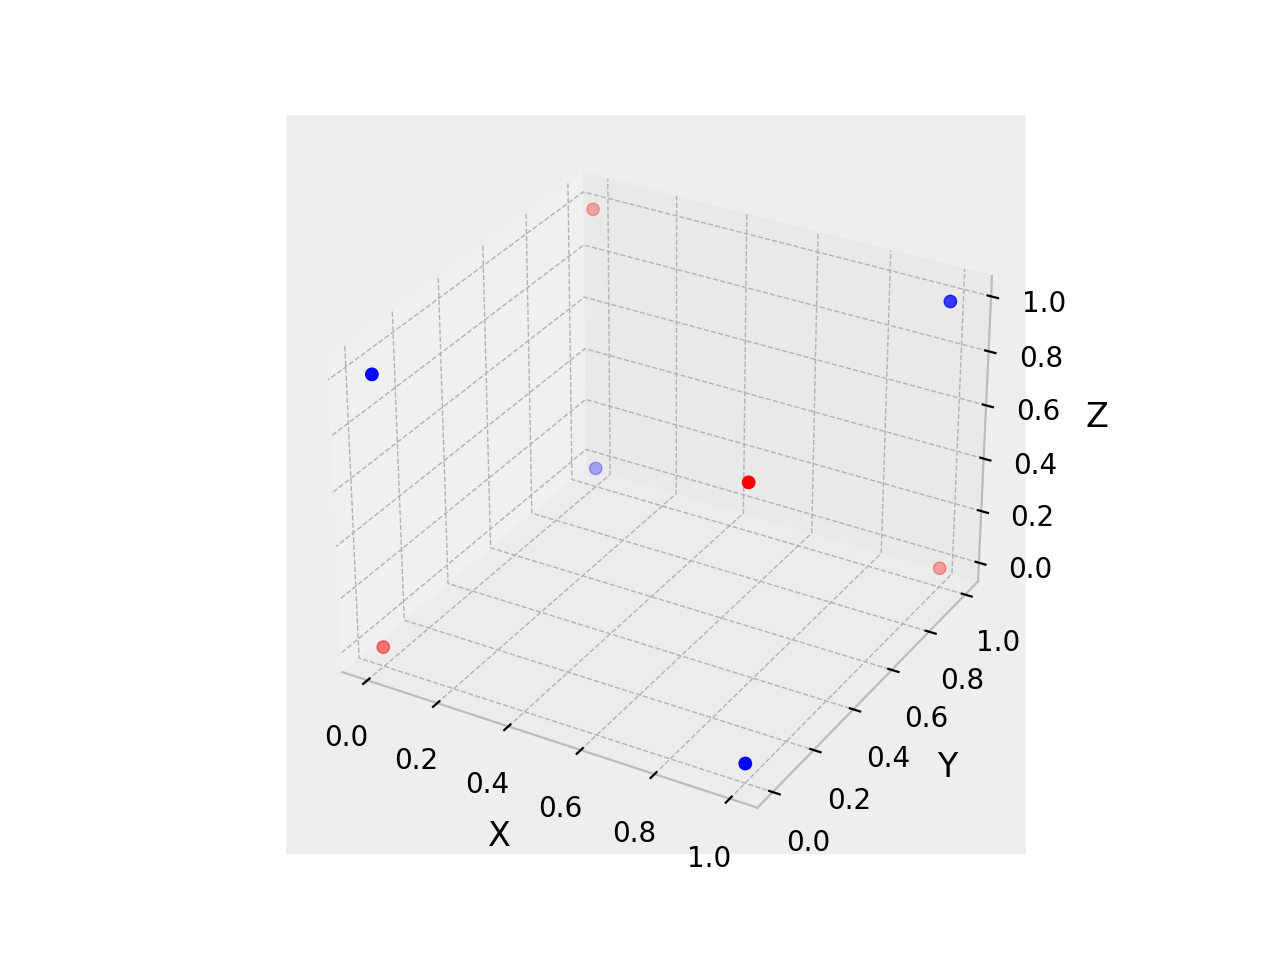

In [5]:
%matplotlib notebook

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X[0,t==0], X[1,t==0], X[2,t==0], c='red')
ax.scatter(X[0,t==1], X[1,t==1], X[2,t==1], c='blue')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');

The mapper function can be written as,

\begin{align*}
y(\mathbf{x}) &= \overline{x}_1 \overline{x}_2 x_3 + \overline{x}_1 x_2 \overline{x}_3 + x_1 \overline{x}_2 \overline{x}_3 + x_1 x_2 x_3\\
&= \overline{x}_1 \left( \overline{x}_2 x_3 + x_2 \overline{x}_3\right) + x_1 \left( \overline{x}_2 \overline{x}_3 + x_2 x_3 \right)\\
&= \overline{x}_1 \left( x_2 \oplus x_3 \right) + x_1 \left( \overline{x_2 \oplus x_3}\right)
\end{align*}

### Alternative Solution (written by TA Andrew Jensen, Summer C 2023)

I did this problem by plotting each of the 8 points at the corners of a cube, then creating 3 separating planes to disect the cube into sub-regions. The first layer defines the plane geometry, the second layer determines which region of the cube each point is in, and the last layer decides the class based on the region of the cube.

$$ W_1 = \begin{bmatrix} -1 & -1 & 0 \\ -1 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \;\; \text{ and } \;\; b_1 = \begin{bmatrix} \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \end{bmatrix}^T $$

The second layer is
$$ W_2 = \begin{bmatrix} -1 & 1 & -1 \\ 1 & -1 & 1\end{bmatrix} \;\; \text{ and } \;\; b_2 = \begin{bmatrix} \frac{1}{2} & -\frac{3}{2} \end{bmatrix}^T $$

The last layer is:

$$ W_3 = \begin{bmatrix}1 & 1 \end{bmatrix}  \;\; \text{ and } \;\; b_3 = 0$$

The overall equation for the perceptron is:
$$ y(\mathbf{x}) = \phi(W_3\phi(W_2 \phi (W_1 \mathbf{x} + b_1) +b_2 )+ b_3) $$

---

# Exercise 5 (4 points)

**Explain why the input-to-hidden weights must be different from each other (e.g., random) or else learning cannot proceed well. Specifically, what happens if the weights are initialized so as to have identical values?**

Suppose the input to hidden weights are set equal to the same value, say $w_o$, then $w_{ij} = w_o$. Then we have

$$v_j = \phi(v_i) = \sum_{j=1}^D w_{ji}\mathbf{x}_i = w_o \sum_{j=1}^D \mathbf{x}_i = w_o \mathbf{x}$$

This means that $y_j = \phi(v_j)$ is constant, say $y_o$. Clearly, whatever the topology of the network, setting the $w_{ji}$ to be a constant is equivalent to changing the topology so that there is only a single input unit, whose input to the next layer is $\mathbf{x}_o$. As a result of this objective of one-layer and number of input units in the next layer, the network will not train well.

---

# Exercise 5 (7 points)

**Answer the following questions, and provide appropriate justifications, about Convolutional Neural Networks (CNNs):**

1. (2 points) **Would you prefer to add more filters in the first convolutional layer or the second convolutional layer?**

Given the choice, I would prefer to have more filters in the second convolutional layer because the first convolutional layer is known for learning low-level features, which there are so many. But there are a lot more ways of arranging low-level features (in the second layer).

2. (2 points) **Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?**

A max pooling layer has no parameters at all, whereas a convolutional layer has quite a few (see the previous questions).

3. (3 points) **Consider a CNN composed of three convolutional layers, each with $3 \times 3$ kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of $200 \times 300$ pixels. What is the total number of parameters in the CNN?**

Since its first convolutional layer has $3 \times 3$ kernels, and the input has three channels (red, green, and blue), each feature map has $3 \times 3 \times 3$ weights, plus a bias term. That's 28 parameters per feature map. Since this first convolutional layer has 100 feature maps, it has a total of 2,800 parameters. The second convolutional layer has $3 \times 3$ kernels and its input is the set of 100 feature maps of the previous layer, so each feature map has $3 \times 3 \times 100 = 900$ weights, plus a bias term. Since it has 200 feature maps, this layer has $901 \times 200 = 180,200$ parameters. Finally, the third and last convolutional layer also has $3 \times 3$ kernels, and its input is the set of 200 feature maps of the previous layers, so each feature map has $3 \times 3 \times 200 = 1,800$ weights, plus a bias term. Since it has 400 feature maps, this layer has a total of $1,801 \times 400 = 720,400$ parameters. All in all, the CNN has $2,800 + 180,200 + 720,400 = 903,400$ parameters.

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___